 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


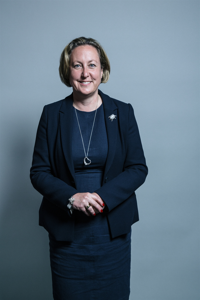

[2021-11-29 14:26:44,322] ERROR in app: Exception on /endpoint [GET]
Traceback (most recent call last):
  File "C:\Users\Sandeep\AppData\Roaming\Python\Python38\site-packages\flask\app.py", line 2070, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Sandeep\AppData\Roaming\Python\Python38\site-packages\flask\app.py", line 1516, in full_dispatch_request
    return self.finalize_request(rv)
  File "C:\Users\Sandeep\AppData\Roaming\Python\Python38\site-packages\flask\app.py", line 1535, in finalize_request
    response = self.make_response(rv)
  File "C:\Users\Sandeep\AppData\Roaming\Python\Python38\site-packages\flask\app.py", line 1698, in make_response
    raise TypeError(
TypeError: The view function for 'endpoint' did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [29/Nov/2021 14:26:44] "GET /endpoint?postcode=E20 HTTP/1.1" 500 -


In [ ]:
from flask import Flask, jsonify, request
from PIL import Image
from IPython.display import display
import requests

app = Flask(__name__)

@app.route('/endpoint',methods=['GET'])
def endpoint():
    
    pincode = request.args.get('postcode')
    url1 = "https://members-api.parliament.uk/api/Location/Constituency/Search"
    PARAMS = {'searchText': pincode}

    r1 = requests.get(url=url1, params=PARAMS)
    data = r1.json()
    
    result1 = data['items'][0]['value']['currentRepresentation']['member']['links'][3]['href']

    Name = data['items'][0]['value']['currentRepresentation']['member']['value']['nameDisplayAs']
    Constituency = data['items'][0]['value']['name']

    url2 = "https://members-api.parliament.uk/api"
    url3 = url2+result1

    r2 = requests.get(url3)
    data1 = r2.json()

    Email = data1['value'][0]['email']
    res = result1[:13]
    a = '/Portrait'
    b = url2+res+a
    img = Image.open(requests.get(b, stream=True).raw)
    img1 = img.resize((200,300))
    img2 = display(img1)


    return img2
if __name__ == '__main__':
            app.run(host='127.0.0.1',port=5000)

